Neste projeto, iremos...

In [1]:
# importando bibliotecas necessárias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# vamos importar os dados 
data = pd.read_csv("german_credit_data.csv", header=(0))

# informações acerca dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [3]:
# pré-visualização das 30 primeiras linhas dos dados
data.head(30)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


Entendendo os dados:
age - idade do cliente
sex - feminino ou masculino
Job - 0(não qualificado e não residente), 1(não qualificado mas residente), 2(qualificado)

In [4]:
# vamos remover as linhas que tem NaN
#data = data.dropna() 
#data.head(25)



In [5]:
### Vamos verificar se possui linhas duplicadas ###

# Retorna True na posição em que há uma linha duplicada
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [6]:
#Procurando valores únicos
data.nunique()


Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

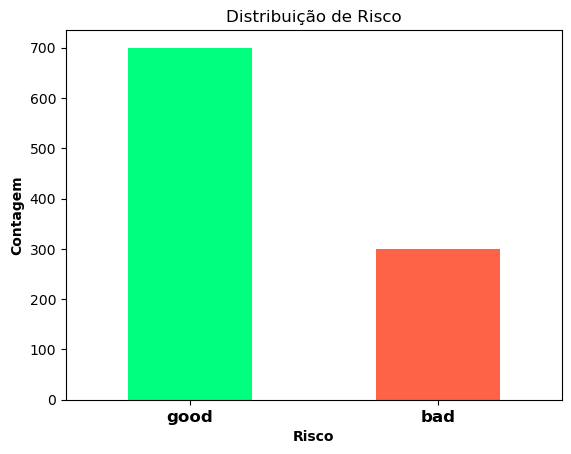

In [7]:
### Contando os clientes "bad" e "good" ###

data['Risk'].value_counts().plot(kind='bar', color=['springgreen', 'tomato'])
plt.title('Distribuição de Risco')
plt.xlabel('Risco', weight='bold')
plt.ylabel('Contagem', weight='bold')
plt.xticks(rotation=0, fontsize = 12, weight='bold')
plt.show()

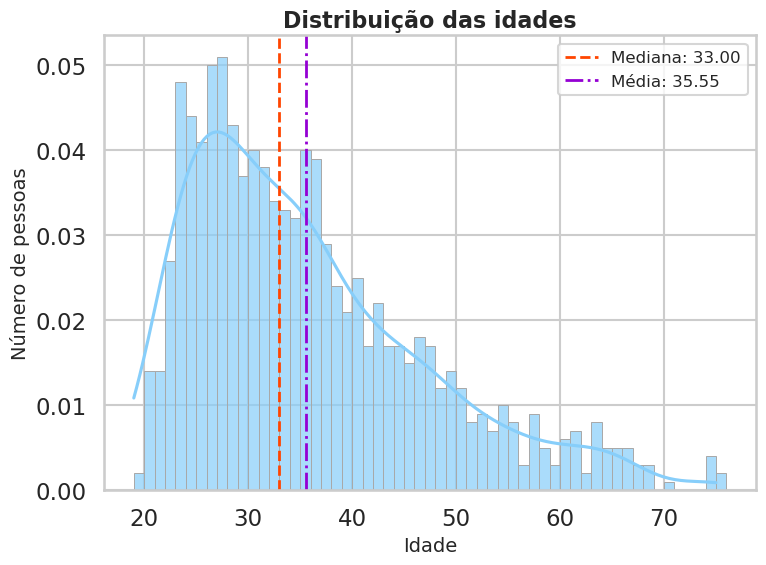

In [8]:
### Agora vamos vizualizar algumas informações dos dados ###

# Histograma das idades
sns.set(style="whitegrid", context="talk")


mediana = np.median(data.Age)
media = np.mean(data.Age)

# Cria o histograma
plt.figure(figsize=(8, 6))
sns.histplot(data.Age, bins=range(int(data.Age.min()), int(data.Age.max()) + 2),
             color="lightskyblue", edgecolor="darkgray", alpha=0.7, kde=True, stat = "density")

plt.title("Distribuição das idades", fontsize=16, weight='bold')
plt.xlabel("Idade", fontsize=14)
plt.ylabel("Número de pessoas", fontsize=14)

# Linhas de referência
plt.axvline(mediana, color='orangered', linestyle='--', linewidth=2,
            label=f"Mediana: {mediana:.2f}")
plt.axvline(media, color='darkviolet', linestyle='-.', linewidth=2,
            label=f"Média: {media:.2f}")

plt.legend(frameon=True, fontsize=12)
plt.tight_layout()
plt.show()

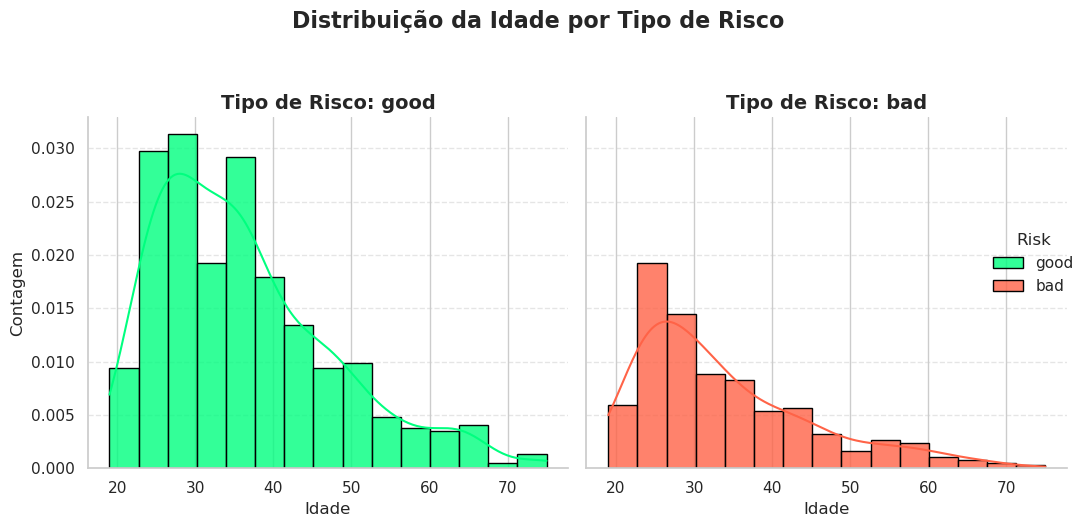

In [10]:
### Histograma de idades para cada tipo de risco ###

sns.set_theme(style="whitegrid")

# Criação dos dois gráficos lado a lado
g = sns.displot(
    data=data,
    x="Age",
    col="Risk",
    hue="Risk",
    kind="hist",
    bins=15,
    kde=True,  # adiciona curva de densidade
    palette=["springgreen", "tomato"],  
    edgecolor="black",
    alpha=0.8,
    height=5,
    aspect=1,
    stat = "density"
)

# Personalização
g.set_titles(col_template="Tipo de Risco: {col_name}", size=14, weight='bold')
g.set_xlabels("Idade", fontsize=12)
g.set_ylabels("Contagem", fontsize=12)
g.fig.suptitle("Distribuição da Idade por Tipo de Risco", fontsize=16, weight='bold', y=1.05)

# Grade suave
for ax in g.axes.flat:
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    


plt.tight_layout()
plt.show()


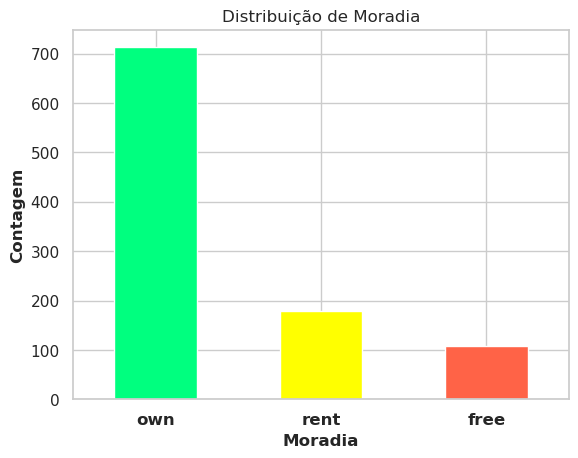

In [11]:
### Contando os clientes "bad" e "good" ###

data['Housing'].value_counts().plot(kind='bar', color=['springgreen', "yellow", 'tomato'])
plt.title('Distribuição de Moradia')
plt.xlabel('Moradia', weight='bold')
plt.ylabel('Contagem', weight='bold')
plt.xticks(rotation=0, fontsize = 12, weight='bold')
plt.show()

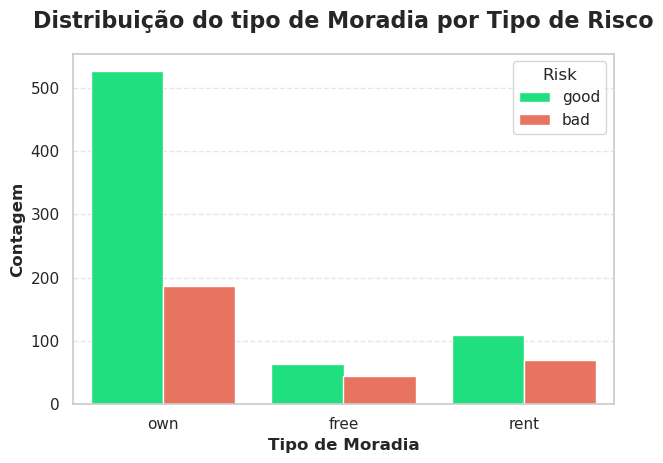

In [12]:

sns.set_theme(style="whitegrid")

# Criação dos dois gráficos lado a lado
g = sns.countplot(
    data=data,
    x="Housing",
    hue="Risk",
    palette=['springgreen', 'tomato'],  
    
)

# Personalização
g.set_xlabel("Tipo de Moradia", fontsize=12, weight='bold')
g.set_ylabel("Contagem", fontsize=12, weight='bold')
plt.title("Distribuição do tipo de Moradia por Tipo de Risco", fontsize=16, weight='bold', y=1.05)


g.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

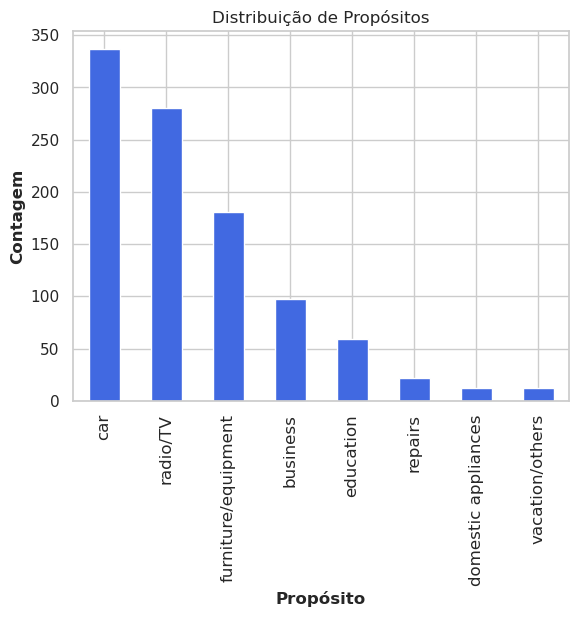

In [13]:
### Contando o propósito do crédito ###

data['Purpose'].value_counts().plot(kind='bar', color = "royalblue")
plt.title('Distribuição de Propósitos')
plt.xlabel('Propósito', weight='bold')
plt.ylabel('Contagem', weight='bold')
plt.xticks(rotation=90, fontsize = 12)
plt.show()

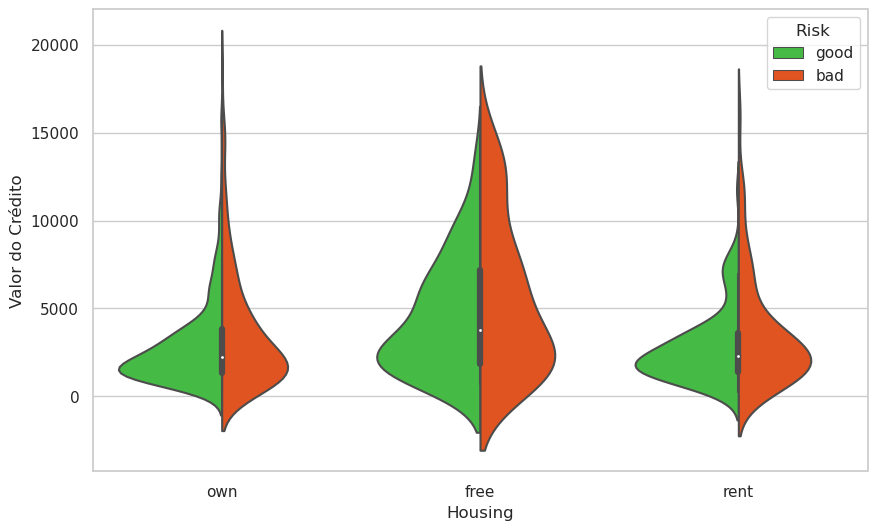

In [15]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",
                   y="Credit amount",
                   data=data,
                   hue="Risk",
                   palette=["limegreen", "orangered"],
                   split=True)

g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Valor do Crédito", fontsize=12)

plt.show()

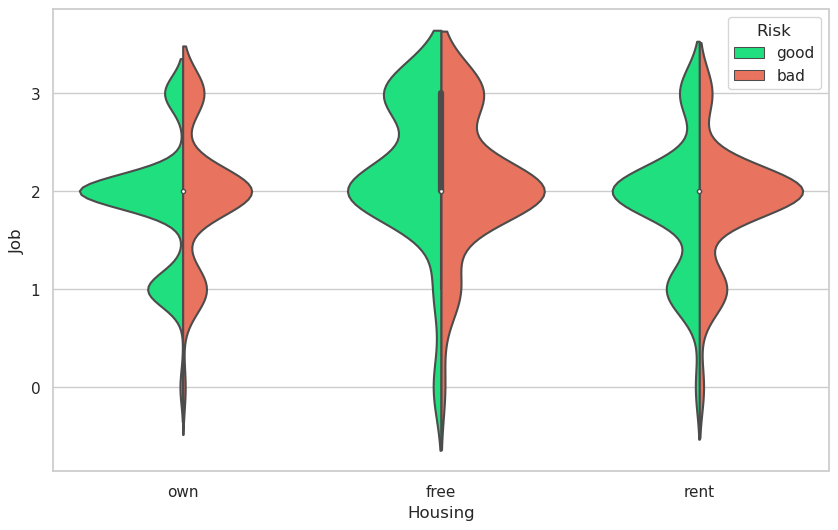

In [16]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",
                   y="Job",
                   data=data,
                   hue="Risk",
                   palette=["springgreen", "tomato"],
                   split=True)

g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)

plt.show()

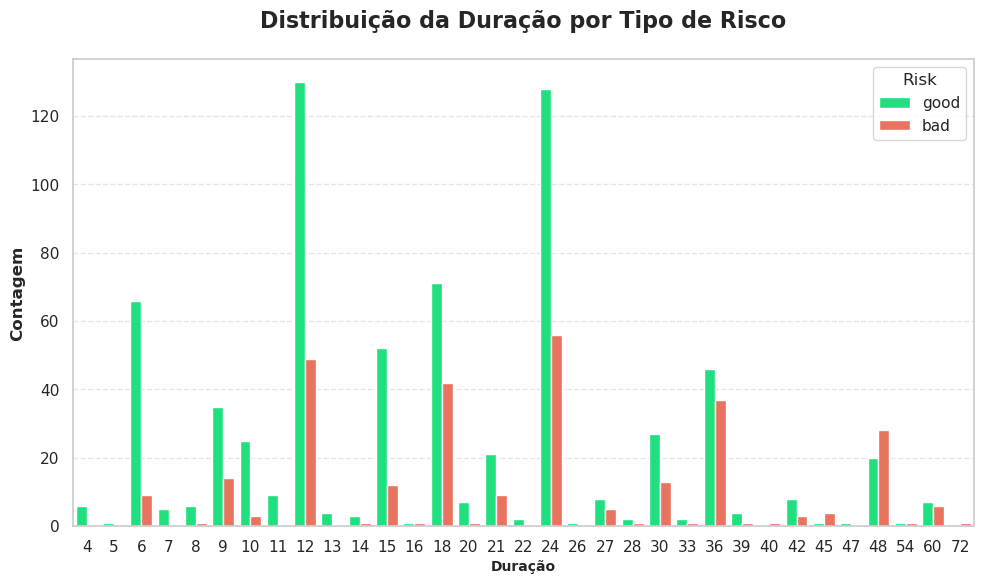

In [17]:
plt.figure(figsize = (10,6))

sns.set_theme(style="whitegrid")

# Criação dos dois gráficos lado a lado
g = sns.countplot(
    data=data,
    x="Duration",
    hue="Risk",
    palette=['springgreen', 'tomato'],  
    
)

# Personalização
g.set_xlabel("Duração", fontsize=10, weight='bold')
g.set_ylabel("Contagem", fontsize=12, weight='bold')
plt.title("Distribuição da Duração por Tipo de Risco", fontsize=16, weight='bold', y=1.05)


g.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

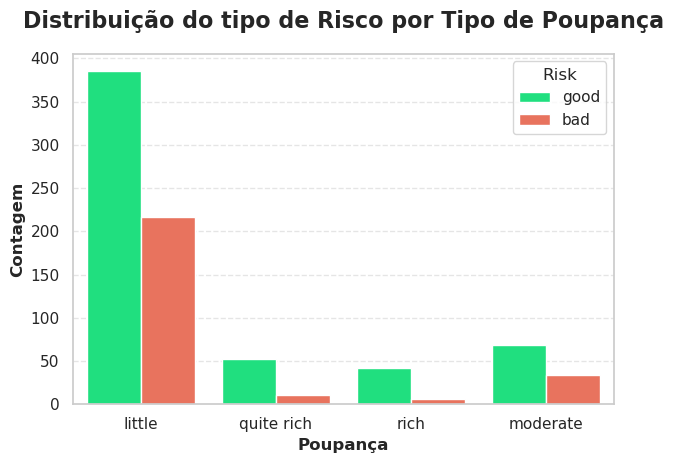

In [18]:



sns.set_theme(style="whitegrid")

# Criação dos dois gráficos lado a lado
g = sns.countplot(
    data=data,
    x="Saving accounts",
    hue="Risk",
    palette=['springgreen', 'tomato'],  
    
)

# Personalização
g.set_xlabel("Poupança", fontsize=12, weight='bold')
g.set_ylabel("Contagem", fontsize=12, weight='bold')
plt.title("Distribuição do tipo de Risco por Tipo de Poupança", fontsize=16, weight='bold', y=1.05)


g.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [22]:
### Vamos verificar a importância das features usando o classificador Random Forest ###


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Preparação simples
df = data.copy() # Cria uma cópia do DataFrame original para não modificar os dados originais
df = df.drop(columns=['Unnamed: 0']) # Remove a coluna 'Unnamed: 0'
df = df.fillna('missing') #Substitui valores faltantes (NaN) pela string 'missing'

# Transformar textos em números
le = LabelEncoder()
for col in df.select_dtypes('object').columns: # Seleciona apenas colunas do tipo texto/object
    df[col] = le.fit_transform(df[col]) # Converte todas as colunas textuais em numéricas

# Cria a variável X (features) removendo a coluna 'Risk' (todas as colunas exceto o target)
X = df.drop('Risk', axis=1) 

# Cria a variável y (target) com apenas a coluna 'Risk'
y = df['Risk']

# Treino e teste
# Divide os dados: 80% para treino, 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestClassifier()
model.fit(X_train, y_train) # Treina o modelo usando os dados de treino (X_train, y_train)

# Avaliação
print(classification_report(y_test, model.predict(X_test)))
print(accuracy_score(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.72      0.39      0.51        59
           1       0.79      0.94      0.85       141

    accuracy                           0.78       200
   macro avg       0.75      0.66      0.68       200
weighted avg       0.77      0.78      0.75       200

0.775


# Análise do Relatório de Classificação

##  Resumo Executivo

- **Acurácia Geral**: 78%
- **Total de Amostras**: 200
- **Classes**: 0 (59 amostras) e 1 (141 amostras)

## Métricas Detalhadas por Classe

### Classe 0
| Métrica | Valor | Interpretação |
|---------|-------|---------------|
| **Precision** | 0.72 | Quando o modelo prediz classe 0, acerta 72% das vezes |
| **Recall** | 0.39 | Apenas 39% dos casos reais da classe 0 são identificados |
| **F1-Score** | 0.51 | Desempenho moderado (média entre precision e recall) |
| **Support** | 59 | Número de amostras no conjunto de teste |

### Classe 1
| Métrica | Valor | Interpretação |
|---------|-------|---------------|
| **Precision** | 0.79 | Quando prediz classe 1, acerta 79% das vezes |
| **Recall** | 0.94 | Excelente - identifica 94% dos casos reais da classe 1 |
| **F1-Score** | 0.85 | Desempenho muito bom |
| **Support** | 141 | Número de amostras no conjunto de teste |

##  Métricas Consolidadas

### Macro Average
- **Precision**: 0.75
- **Recall**: 0.66  
- **F1-Score**: 0.68
- **Interpretação**: Média simples entre classes - útil quando classes têm igual importância

### Weighted Average
- **Precision**: 0.77
- **Recall**: 0.78
- **F1-Score**: 0.75
- **Interpretação**: Média ponderada pelo número de amostras - mais representativa da performance geral

##  Análise de Desempenho

###  Pontos Fortes
- **Alta acurácia geral** (78%)
- **Excelente capacidade de detecção da classe 1** (recall de 94%)
- **Precision balanceada** entre ambas as classes
- **Bom desempenho geral** considerando o desbalanceamento das classes

###  Pontos de Atenção
- **Baixo recall para classe 0** (39%) - muitos falsos negativos
- **Desequilíbrio significativo** de classes (141 vs 59 amostras)
- **Performance desigual** entre classes



##  Conclusão

O modelo apresenta **desempenho satisfatório** para a classe majoritária (1), mas necessita de **otimizações** para melhor detectar a classe minoritária (0). A acurácia de 78% é boa, porém mascara a **performance desigual** entre classes. Recomenda-se focar em técnicas de balanceamento para tornar o modelo mais robusto para ambas as classes.

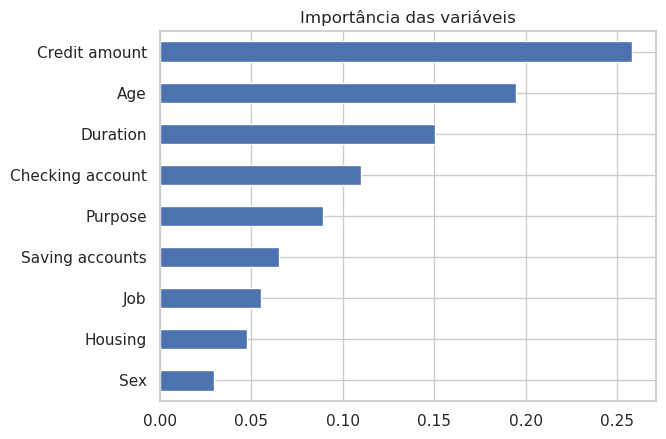

In [23]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Importância das variáveis')
plt.show()